**Import Packages**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
import random
import shutil
import tensorflow as tf
import pathlib

random.seed(244)

**Define Important Functions**

In [6]:
def roı_clahe_pre_process(img):
  if len(img.shape) == 3: #Check if image is rgb
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #convert rgb to gray scala for apply threshold
  
  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8)) #determine clahe values
  img = clahe.apply(img) #apply clahe transform on image
  return img 

In [7]:
def plot2images(img1, img2): #plot two Images Together
    plt.figure(figsize=(8,6))
    ax = plt.subplot(1, 2, 1)
    plt.imshow(img1, 'gray')
    plt.axis("off")
    ax = plt.subplot(1, 2, 2)
    plt.imshow(img2, 'gray')
    plt.axis("off")
    plt.subplots_adjust(hspace=0, wspace=0.1)
    plt.show()

**Download Dataset**

In [ ]:
dataset_url = 'https://figshare.com/ndownloader/articles/14825193/versions/2'
archive = tf.keras.utils.get_file(origin=dataset_url, extract=True)
data_dir = pathlib.Path(archive)

16255653603/16255653603 [==============================] - 744s 0us/step


**Extract Images Files**

In [ ]:
!rm /root/.keras/datasets/2

In [ ]:
!mkdir /dataset

In [ ]:
!unzip '/root/.keras/datasets/images_part1.zip' -d '/dataset/images'

Streaming output truncated to the last 5000 lines.
  inflating: /dataset/images/0014_0516192868_01_WRI-L2_M006.png  
 extracting: /dataset/images/0014_0516793680_02_WRI-L1_M006.png  
 extracting: /dataset/images/0014_0516793756_02_WRI-L2_M006.png  
 extracting: /dataset/images/0014_0517394593_03_WRI-L1_M006.png  
  inflating: /dataset/images/0014_0517394665_03_WRI-L2_M006.png  
 extracting: /dataset/images/0015_0668695173_01_WRI-L1_F008.png  
  inflating: /dataset/images/0015_0668695209_01_WRI-L2_F008.png  
 extracting: /dataset/images/0016_0320600143_01_WRI-L1_F010.png  
 extracting: /dataset/images/0016_0320600198_01_WRI-L2_F010.png  
 extracting: /dataset/images/0016_0321123728_02_WRI-L1_F010.png  
  inflating: /dataset/images/0016_0321123759_02_WRI-L2_F010.png  
 extracting: /dataset/images/0017_1043285040_01_WRI-L1_F001.png  
 extracting: /dataset/images/0017_1043285078_01_WRI-L2_F001.png  
  inflating: /dataset/images/0018_1173779048_01_WRI-R2_M015.png  
 extracting: /dataset/ima

In [ ]:
!rm '/root/.keras/datasets/images_part1.zip'

In [ ]:
!unzip '/root/.keras/datasets/images_part2.zip' -d '/dataset/images'

Streaming output truncated to the last 5000 lines.
  inflating: /dataset/images/1536_1074881472_03_WRI-L1_M010.png  
  inflating: /dataset/images/1536_1074881562_03_WRI-L2_M010.png  
  inflating: /dataset/images/1537_1207771134_01_WRI-L1_F004.png  
  inflating: /dataset/images/1537_1207771187_01_WRI-L2_F004.png  
  inflating: /dataset/images/1538_1052337323_01_WRI-L1_M017.png  
  inflating: /dataset/images/1538_1052337363_01_WRI-L2_M017.png  
 extracting: /dataset/images/1539_0310878720_01_WRI-L1_F015.png  
  inflating: /dataset/images/1539_0310878755_01_WRI-L2_F015.png  
  inflating: /dataset/images/1540_0941822140_01_WRI-R2_F014.png  
 extracting: /dataset/images/1541_1030156806_01_WRI-L1_F009.png  
  inflating: /dataset/images/1541_1030156851_01_WRI-L2_F009.png  
 extracting: /dataset/images/1541_1030161327_02_WRI-L1_F009.png  
 extracting: /dataset/images/1541_1030161416_02_WRI-L2_F009.png  
  inflating: /dataset/images/1542_0131733551_01_WRI-R1_F009.png  
  inflating: /dataset/ima

In [ ]:
!rm '/root/.keras/datasets/images_part2.zip'

In [ ]:
!unzip '/root/.keras/datasets/images_part3.zip' -d '/dataset/images'

Archive:  /root/.keras/datasets/images_part3.zip
  inflating: /dataset/images/3000_1038886552_01_WRI-R1_M017.png  
 extracting: /dataset/images/3000_1038886587_01_WRI-R2_M017.png  
 extracting: /dataset/images/3001_0467767722_01_WRI-L2_F005.png  
 extracting: /dataset/images/3001_0467767816_01_WRI-L1_F005.png  
 extracting: /dataset/images/3001_0468514675_02_WRI-L2_F005.png  
 extracting: /dataset/images/3001_0468514755_02_WRI-L1_F005.png  
  inflating: /dataset/images/3001_0469208319_03_WRI-L2_F005.png  
 extracting: /dataset/images/3001_0469208422_03_WRI-L1_F005.png  
 extracting: /dataset/images/3002_1012764606_01_WRI-L1_M008.png  
  inflating: /dataset/images/3002_1012764634_01_WRI-L2_M008.png  
 extracting: /dataset/images/3002_1013365988_02_WRI-L1_M009.png  
  inflating: /dataset/images/3002_1013366021_03_WRI-L2_M009.png  
 extracting: /dataset/images/3002_1014572818_04_WRI-L1_M009.png  
  inflating: /dataset/images/3002_1014572860_04_WRI-L2_M009.png  
  inflating: /dataset/image

In [ ]:
!rm '/root/.keras/datasets/images_part3.zip'

In [ ]:
!unzip '/root/.keras/datasets/images_part4.zip' -d '/dataset/images'

Streaming output truncated to the last 5000 lines.
  inflating: /dataset/images/4584_1095189599_01_WRI-R2_M007.png  
 extracting: /dataset/images/4584_1151264641_02_WRI-R1_M009.png  
  inflating: /dataset/images/4584_1151264682_02_WRI-R2_M009.png  
 extracting: /dataset/images/4585_0910481351_01_WRI-R1_F015.png  
  inflating: /dataset/images/4585_0910481388_01_WRI-R2_F015.png  
  inflating: /dataset/images/4586_0884855982_01_WRI-L1_F015.png  
  inflating: /dataset/images/4586_0884856014_02_WRI-L2_F015.png  
 extracting: /dataset/images/4587_0374311741_01_WRI-L1_M010.png  
  inflating: /dataset/images/4587_0374311805_01_WRI-L2_M010.png  
 extracting: /dataset/images/4587_0374883247_02_WRI-L1_M010.png  
 extracting: /dataset/images/4587_0374883292_02_WRI-L2_M010.png  
 extracting: /dataset/images/4587_0376004535_03_WRI-L1_M010.png  
 extracting: /dataset/images/4587_0376004566_03_WRI-L2_M010.png  
 extracting: /dataset/images/4588_1034162079_01_WRI-L1_F000.png  
 extracting: /dataset/ima

In [ ]:
!rm '/root/.keras/datasets/images_part4.zip'

In [ ]:
!unzip '/root/.keras/datasets/folder_structure.zip' -d '/dataset/labels'

Streaming output truncated to the last 5000 lines.
  inflating: /dataset/labels/yolov5/labels/4584_1151264641_02_WRI-R1_M009.txt  
  inflating: /dataset/labels/yolov5/labels/4584_1151264682_02_WRI-R2_M009.txt  
  inflating: /dataset/labels/yolov5/labels/4585_0910481351_01_WRI-R1_F015.txt  
 extracting: /dataset/labels/yolov5/labels/4585_0910481388_01_WRI-R2_F015.txt  
 extracting: /dataset/labels/yolov5/labels/4586_0884855982_01_WRI-L1_F015.txt  
  inflating: /dataset/labels/yolov5/labels/4586_0884856014_02_WRI-L2_F015.txt  
  inflating: /dataset/labels/yolov5/labels/4587_0374311741_01_WRI-L1_M010.txt  
  inflating: /dataset/labels/yolov5/labels/4587_0374311805_01_WRI-L2_M010.txt  
  inflating: /dataset/labels/yolov5/labels/4587_0374883247_02_WRI-L1_M010.txt  
  inflating: /dataset/labels/yolov5/labels/4587_0374883292_02_WRI-L2_M010.txt  
  inflating: /dataset/labels/yolov5/labels/4587_0376004535_03_WRI-L1_M010.txt  
  inflating: /dataset/labels/yolov5/labels/4587_0376004566_03_WRI-L2_

In [ ]:
!rm /root/.keras/datasets/folder_structure.zip

In [ ]:
!mkdir /content/drive/MyDrive/dataset

mkdir: cannot create directory ‘/content/drive/MyDrive/dataset’: File exists


In [ ]:
!rm -rf /content/drive/MyDrive/dataset/labels

In [ ]:
!mv /dataset/labels /content/drive/MyDrive/dataset

**Preprocess Images Dataset**

In [ ]:
!mkdir '/content/drive/MyDrive/dataset/preprocessed images'

mkdir: cannot create directory ‘/content/drive/MyDrive/dataset/preprocessed images’: File exists


In [ ]:
imgs_path = '/dataset/images'
new_imgs_path = '/content/drive/MyDrive/dataset/preprocessed images'
for filename in os.listdir(imgs_path):
    img = cv2.imread(os.path.join(imgs_path, filename), 0)
    preprocessed_img = roı_clahe_pre_process(img)
    img_arr = np.asarray(preprocessed_img)
    cv2.imwrite(os.path.join(new_imgs_path, filename), img_arr)

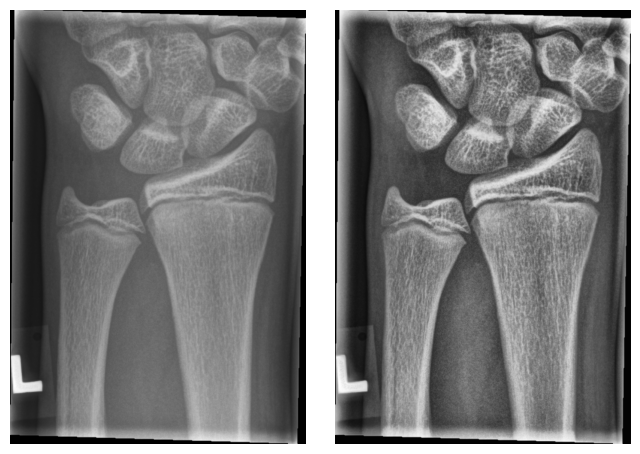

In [ ]:
img1 = cv2.imread('/dataset/images/0001_1297860395_01_WRI-L1_M014.png')
img2 = cv2.imread('/content/drive/MyDrive/dataset/preprocessed images/0001_1297860395_01_WRI-L1_M014.png')
plot2images(img1, img2)

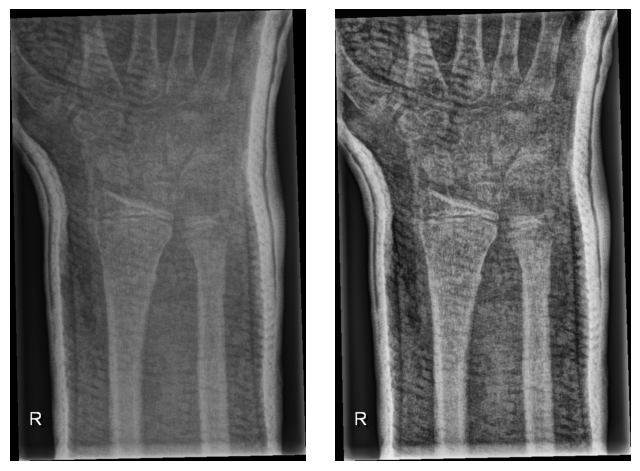

In [ ]:
img1 = cv2.imread('/dataset/images/0003_0663715732_02_WRI-R1_M011.png')
img2 = cv2.imread('/content/drive/MyDrive/dataset/preprocessed images/0003_0663715732_02_WRI-R1_M011.png')
plot2images(img1, img2)

### Split Data 

In [ ]:
!rm -rf /content/drive/MyDrive/dataset/train_data
!rm -rf /content/drive/MyDrive/dataset/validation_data
!rm -rf /content/drive/MyDrive/dataset/test_data


In [ ]:
!rm -rf /content/drive/MyDrive/dataset/train_data

In [8]:
!mkdir /content/drive/MyDrive/dataset/train_data
!mkdir /content/drive/MyDrive/dataset/train_data/images
!mkdir /content/drive/MyDrive/dataset/train_data/labels
!mkdir /content/drive/MyDrive/dataset/validation_data
!mkdir /content/drive/MyDrive/dataset/validation_data/images
!mkdir /content/drive/MyDrive/dataset/validation_data/labels
!mkdir /content/drive/MyDrive/dataset/test_data
!mkdir /content/drive/MyDrive/dataset/test_data/images
!mkdir /content/drive/MyDrive/dataset/test_data/labels

mkdir: cannot create directory ‘/content/drive/MyDrive/dataset/train_data’: File exists
mkdir: cannot create directory ‘/content/drive/MyDrive/dataset/train_data/images’: File exists
mkdir: cannot create directory ‘/content/drive/MyDrive/dataset/train_data/labels’: File exists
mkdir: cannot create directory ‘/content/drive/MyDrive/dataset/validation_data’: File exists
mkdir: cannot create directory ‘/content/drive/MyDrive/dataset/validation_data/images’: File exists
mkdir: cannot create directory ‘/content/drive/MyDrive/dataset/validation_data/labels’: File exists
mkdir: cannot create directory ‘/content/drive/MyDrive/dataset/test_data’: File exists
mkdir: cannot create directory ‘/content/drive/MyDrive/dataset/test_data/images’: File exists
mkdir: cannot create directory ‘/content/drive/MyDrive/dataset/test_data/labels’: File exists


In [9]:
data = os.listdir('/content/drive/MyDrive/dataset/preprocessed images')
random.shuffle(data)
train_data = data[:int(len(data)*0.7)]
validation_data = data[int(len(data)*0.7):int(len(data)*0.8)]
test_data = data[int(len(data)*0.8):]

In [10]:
print(len(data))

20327


In [ ]:
!mkdir /content/dataset
!mkdir /content/dataset/train_data
!mkdir /content/dataset/train_data/images
!mkdir /content/dataset/train_data/labels
!mkdir /content/dataset/validation_data
!mkdir /content/dataset/validation_data/images
!mkdir /content/dataset/validation_data/labels
!mkdir /content/dataset/test_data
!mkdir /content/dataset/test_data/images
!mkdir /content/dataset/test_data/labels

mkdir: cannot create directory ‘/content/dataset’: File exists


In [11]:
labels_dir = '/content/drive/MyDrive/dataset/labels/yolov5/labels'
images_dir = '/content/drive/MyDrive/dataset/preprocessed images'
train_dir = '/content/drive/MyDrive/dataset/train_data'
validation_dir = '/content/drive/MyDrive/dataset/validation_data'
test_dir = '/content/drive/MyDrive/dataset/test_data'

In [13]:
(len(os.listdir(labels_dir)), len(os.listdir(images_dir)))

(20327, 20327)

In [14]:
for image in train_data:
  shutil.move(os.path.join(images_dir, image), os.path.join(train_dir, 'images'))
  shutil.move(os.path.join(labels_dir, image.replace('png', 'txt')),
              os.path.join(train_dir, 'labels'))

In [15]:
for image in validation_data:
  shutil.move(os.path.join(images_dir, image), os.path.join(validation_dir, 'images'))
  shutil.move(os.path.join(labels_dir, image.replace('png', 'txt')),
              os.path.join(validation_dir, 'labels'))

In [16]:
for image in test_data:
  shutil.move(os.path.join(images_dir, image), os.path.join(test_dir, 'images'))
  shutil.move(os.path.join(labels_dir, image.replace('png', 'txt')),
              os.path.join(test_dir, 'labels'))

In [17]:
(len(os.listdir('/content/drive/MyDrive/dataset/train_data/images')),
 len(os.listdir('/content/drive/MyDrive/dataset/validation_data/images')),
 len(os.listdir('/content/drive/MyDrive/dataset/test_data/images')))

(14228, 2033, 4066)

In [18]:
import os
len(os.listdir('/content/drive/MyDrive/dataset/preprocessed images'))

0

In [19]:
len(os.listdir('/content/drive/MyDrive/dataset/train_data/images'))

14228

In [21]:
len(os.listdir('/content/drive/MyDrive/dataset/train_data/labels'))

14228